<a href="https://colab.research.google.com/github/nikhilkumarreddy/Check-perfect-JIO-DATA-plan-for-you-/blob/master/playground1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2 

     |████████████████████████████████| 81kB 2.6MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=a003883c79999b33c48e7e3bffe46f192c262d9785a1cf18a0a9ca187cff3456
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [21]:
import time
import PyPDF2
import re
import os

In [22]:
def data(ab): 
  dataa = ''
  x = 0
  for i in ab:
    if i == '.':
      x = ab.index(i)
      #print(x)
  dataa = ab[:x]+ab[x:x+4]
  return float(dataa)
  

print(data('1064.8251064.8251064.8250.0000.0'))



1064.825


In [23]:
def data_plan(total):
  plan_name = ''
  day = total.find('/day')

  for i in range(day-4 , day):
    plan_name += total[i]

  return plan_name
    


In [24]:
dict ={}
def Data_days(total):
  
  pattern = 'JIO'
  finall = [match.start() for match in re.finditer(pattern, total)] 

  for j in finall:
    abc = ''
    for i in range(j-36, j):
      abc +=total[i]
      dates = abc[:9]

    abcd = ''
    for k in range(j+6 , j+15):
      abcd += total[k]
      datas = data(abcd)

    
    if dates in dict:
      dict[dates] = dict.get(dates) + datas
 
    else:
      dict[dates] = datas
    
  return dict




In [25]:
#difference the pan and useage
waste_dict  = {}
def waste_data(dict , plan):
  for i  , j in dict.items():
    waste_dict[i] = plan - j

  return waste_dict

    


In [26]:
#counts the waste and over waste
def waste_over(waste_dict):
  ok = waste_dict.values()
  ok = list(ok)

  over_data_1 = 0
  waste_data_1 = 0

  for i in ok:
    if i <= 0:
      waste_data_1 += i
    else:
      over_data_1 += i

  #print(waste_data_1 , over_data_1)

  return waste_data_1 , over_data_1



In [45]:
def percentage_calculate(plan_list , waste_data_1 , over_data_1):
  total_data = 0
  percentage = 0 
  for i in plan_list:
    total_data += i*30 

  percentage = waste_data_1 / total_data * 100

  return percentage 


def extra_data_plan(waste_dict ):
  waste_dict -= waste_dict % -1000

  return abs(waste_dict)



In [49]:
import matplotlib.pyplot as plt
def plot(percentage ):
  labels = 'Data_Wasted', 'Data_Used' 
  sizes = [percentage ,  100 - percentage]
  explode = ( 0.1 , 0)  
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal') 
  plt.show()


In [47]:
#Main function

start = time.process_time()
dict = {}
plan_list = []
waste_data_1 = 0
over_data_1 = 0
for file in os.listdir("/content/drive/My Drive/jio/"):
  if file.endswith(".pdf"):
    FileName = os.path.join("/content/drive/My Drive/jio/", file)
    pdf = open(FileName, "rb")
          
    Pdf = PyPDF2.PdfFileReader(pdf)

    for i in range(0, Pdf.getNumPages()):
      PageObj = Pdf.getPage(i)
      total = PageObj.extractText()
      if i == 1:
        plan = data_plan(total)[0]

        plan = int(plan + '000')
        plan_list.append(plan)


  
      dict = Data_days(total)

    waste = waste_data(dict , plan)
    over_data_1 , waste_data_1 = waste_over(waste_dict)

    percentage = percentage_calculate(plan_list , waste_data_1 , over_data_1)
    extra_plan = extra_data_plan(over_data_1 )


#plot( percentage )

  
    
print(dict)
print(plan_list)
print(percentage)
print(extra_plan)
print()

print("time taken -- = " , time.process_time() - start)

{'30-APR-20': 2067.2340000000004, '29-APR-20': 1484.7420000000002, '28-APR-20': 2173.922, '27-APR-20': 2791.38, '26-APR-20': 2553.4309999999996, '25-APR-20': 1973.356, '24-APR-20': 1996.695, '23-APR-20': 2456.029, '22-APR-20': 2176.641, '21-APR-20': 2103.3650000000002, '20-APR-20': 1354.7959999999998, '19-APR-20': 1719.999, '18-APR-20': 1660.128, '17-APR-20': 2136.9339999999997, '16-APR-20': 2650.846, '15-APR-20': 1844.8339999999998, '14-APR-20': 1687.347, '13-APR-20': 1868.057, '12-APR-20': 1412.6109999999999, '11-APR-20': 1308.521, '10-APR-20': 1356.384, '09-APR-20': 1887.9980000000003, '08-APR-20': 1486.7510000000002, '07-APR-20': 1321.582, '06-APR-20': 1310.6619999999998, '05-APR-20': 1862.435, '04-APR-20': 856.8280000000001, '03-APR-20': 1349.154, '02-APR-20': 2506.612, '01-APR-20': 3674.3830000000003, '30-MAY-20': 1746.703, '29-MAY-20': 1754.365, '28-MAY-20': 1828.4679999999998, '27-MAY-20': 1833.191, '26-MAY-20': 1969.7230000000002, '25-MAY-20': 5352.644, '24-MAY-20': 3540.815, 

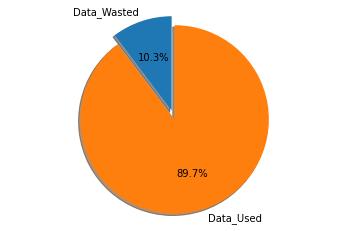

In [50]:
plot(percentage )

In [38]:
print(waste_data_1 , over_data_1)
print(waste_over(waste_dict))

15147.847000000002 -5453.413000000001
(-5453.413000000001, 15147.847000000002)


In [31]:
len(waste_dict)
waste_dict

{'01-MAR-20': 443.9660000000001,
 '02-MAR-20': 1200.5819999999999,
 '03-MAR-20': 218.5340000000001,
 '04-MAR-20': 611.0559999999998,
 '05-MAR-20': 422.51,
 '06-MAR-20': 793.5990000000002,
 '07-MAR-20': 57.567000000000235,
 '08-MAR-20': -210.1949999999997,
 '09-MAR-20': 448.65599999999995,
 '10-MAR-20': 857.2889999999998,
 '11-MAR-20': 180.24500000000012,
 '12-MAR-20': -162.067,
 '13-MAR-20': 544.9479999999999,
 '14-MAR-20': -161.23599999999988,
 '15-MAR-20': -565.9710000000005,
 '16-MAR-20': 365.01099999999997,
 '17-MAR-20': 524.671,
 '18-MAR-20': 489.6060000000002,
 '19-MAR-20': 31.450000000000045,
 '20-MAR-20': 1024.4,
 '21-MAR-20': 902.512,
 '22-MAR-20': 748.2640000000001,
 '23-MAR-20': 1094.5259999999998,
 '24-MAR-20': 94.94699999999966,
 '25-MAR-20': -4353.944000000001,
 '26-MAR-20': 714.096,
 '27-MAR-20': 900.857,
 '28-MAR-20': 777.327,
 '29-MAR-20': 724.7530000000002,
 '30-MAR-20': 976.4750000000001}

In [32]:
plan_list

[2000]